In [1]:
import numpy as np

from microrender import Window, Vertices, Quaternion, Matrix

n = 250
window = Window(n, n)
rotation_axis, angle = np.array([1.0, 0.0, 0.0]), 0.1
vertices = Vertices.from_ply(
    R"test/models/bun000.ply", scale=4, shift=[0, -0.45, 0], voxel_size=0.005
)
rotatable = Quaternion.rotatable([0.0, 0.0, 1.0], np.pi / 2)
vertices.rotate(rotatable)  # align in front of view

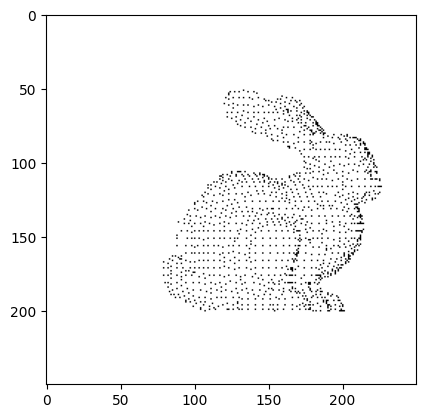

In [2]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image


rotatable = Quaternion.rotatable(rotation_axis, angle)
for i in range(100):
    plt.imshow(Image.fromarray(window.render(vertices)))
    plt.show()
    vertices.rotate(rotatable)
    clear_output(wait=True)

In [3]:
rotatable = Matrix.rotatable(rotation_axis, angle)
%timeit vertices.rotate(rotatable)

6.06 µs ± 454 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [4]:
rotatable = Quaternion.rotatable(rotation_axis, angle)
%timeit vertices.rotate(rotatable)

6.01 µs ± 865 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
